In [18]:
import numpy as np
import pandas as pd
import math as m
import cmath
import sympy as sym
import scipy as sci
import matplotlib.ticker as ticker
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from sympy import pprint
from scipy.optimize import minimize 
# import MLE_functions as fn
import MLE_functions_numpy as fnn
from MLE_functions_numpy import *
from scipy.optimize import fsolve
import pandas as pd

import warnings     # for suppresing the complex error warnings
warnings.filterwarnings("ignore", message="Casting complex values to real discards the imaginary part")
warnings.filterwarnings("ignore", category=np.ComplexWarning)

In [25]:
#plotting function
def plot_ppm_errors(error_sum_lists, bins =25, xlim = (None, None), ylim = (None, None)):  # creates histogram and box plot of inversion and optimization ppm errors
    inv = error_sum_lists[0]    # list of ppm errors for inversion and optimization methods
    opt = error_sum_lists[1]    
    
    # histogram
    plt.hist([inv, opt], bins=bins, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
    plt.xlabel('Sum of PPM Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.legend()
    plt.xlim([ xlim[0],xlim[1]]) 
    plt.savefig('high_resolution_plot.png', dpi=600, format='png')  # uncomment to save 600 DPI for high png 
    plt.show()
    # box plot
    plt.boxplot([inv, opt], labels=['Inversion', 'Optimization'], 
                patch_artist=True, 
                boxprops=dict(facecolor='mintcream', color='blue'),
                whiskerprops=dict(color='green'), 
                capprops=dict(color='magenta'), 
                flierprops=dict(color='yellow', markeredgecolor='black'))
    
    plt.ylabel('Sum of PPM Errors')
    plt.ylim(ylim[0], ylim[1]) 
    plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
    
    # plt.savefig('high_resolution_plot.png', dpi=600, format='png')  # uncomment to save 600 DPI for high png 
    plt.show()

    # statistical properties
    average_inversion = np.mean(inv)
    average_optimization = np.mean(opt)
    std_dev_inversion = np.std(inv)
    std_dev_optimization = np.std(opt)
    avg_difference = np.sum(np.array(inv) - np.array(opt)) / len(inv)
    std_dev_difference = np.std(np.array(inv) - np.array(opt))
    # print statistical properties
    print(f"Average of PPM Inversion Errors: {average_inversion}")
    print(f"Average of PPM Optimization Errors: {average_optimization}")
    print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
    print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
    print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")
    

## Data processing


Four different states

*tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi


*tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi


*tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha 

*tru4 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12] # 15 deg diff, very uneven alpha 

In [21]:
tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]      # 90 deg non zero phi; [30,120,45,90,30]
tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi; [15,75,45,90,60]
tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                  # 30 deg diff, very uneven alpha  ; [30,60,0,45,15]
tru4 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12] # 15 deg diff, very uneven alpha ; [105,120,0,90,15]

# Reading collapse data from filenames, and creating lists from the dataframes
file_names = ['collapses_(30 120 45 90 30) 1k 1k.csv', 'collapses_(15 75 45 90 60) 1k 1k.csv','collapses_(30 60 0 45 15) 1k 1k.csv',  'collapses_(105 120 0 90 15) 500 500.csv', 'collapses_(105 120 0 90 15) 20k 100.csv']
dataframes = [pd.read_csv(file_name) for file_name in file_names]
data_list = [df.to_numpy().tolist() for df in dataframes]
nju1, nju2, nju3, nju4_500, nju4_20k = data_list        #lists of the fixed collapse data for each set of true parameters

In [22]:
# creating error lists (~38/50 minutes) for both inversion initial guess and random initial guess
errors1_inv = ppm_errors_data(tru1, nju1, ig = 'inv')
errors2_inv = ppm_errors_data(tru2, nju2, ig = 'inv')
errors3_inv = ppm_errors_data(tru3, nju3, ig = 'inv')
errors4_500_inv = ppm_errors_data(tru4, nju4_500, ig = 'inv')
errors4_20k_inv = ppm_errors_data(tru4, nju4_20k, ig = 'inv')       # errors for inversion guess

# errors1_rand = ppm_errors_data(tru1, nju1, ig = 'rand')
# errors2_rand = ppm_errors_data(tru2, nju2, ig = 'rand')
# errors3_rand = ppm_errors_data(tru3, nju3, ig = 'rand')
# errors4_500_rand = ppm_errors_data(tru4, nju4_500, ig = 'rand')
# errors4_20k_rand = ppm_errors_data(tru4, nju4_20k, ig = 'rand')     # errors for random guess, modify lentghs as needed

## My data plots

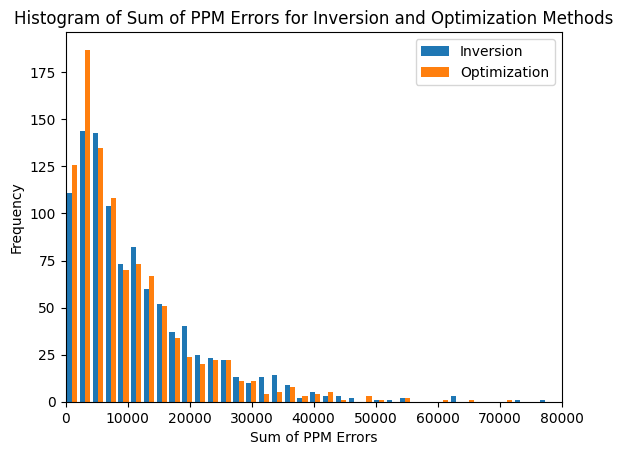

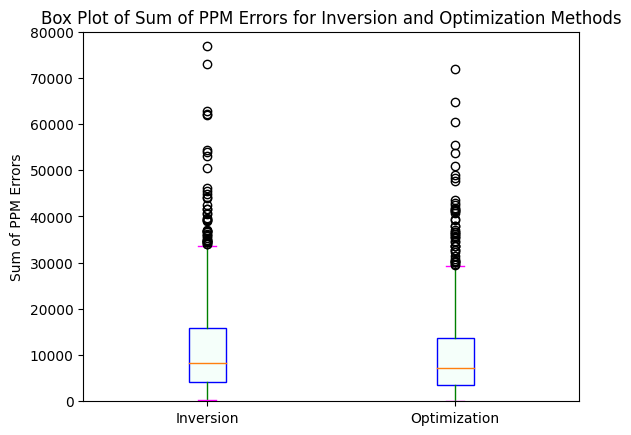

Average of PPM Inversion Errors: 11551.084288721351
Average of PPM Optimization Errors: 10239.24471469563
Standard Deviation of PPM Errors : Inversion Method: 10592.55859889549
Standard Deviation of PPM Errors : Optimization Method: 9582.942884018648
Average Difference between Optimization and Inversion PPM Errors: 1311.8395740257208


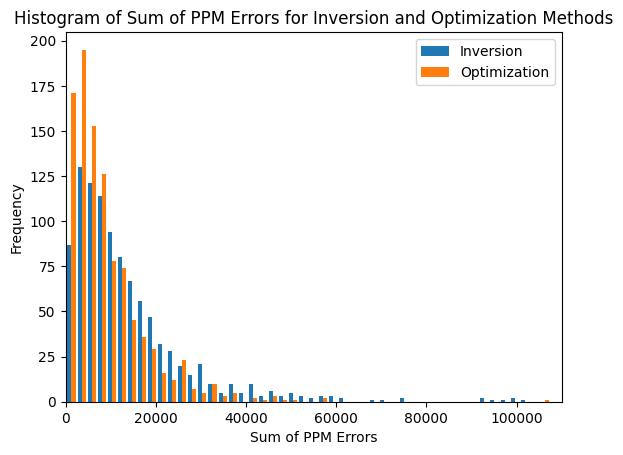

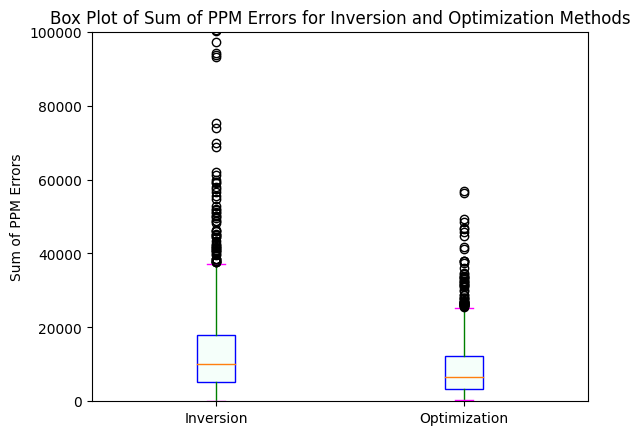

Average of PPM Inversion Errors: 16063.402527822594
Average of PPM Optimization Errors: 9268.959555421132
Standard Deviation of PPM Errors : Inversion Method: 28479.540107588673
Standard Deviation of PPM Errors : Optimization Method: 10086.124184956567
Average Difference between Optimization and Inversion PPM Errors: 6794.44297240146


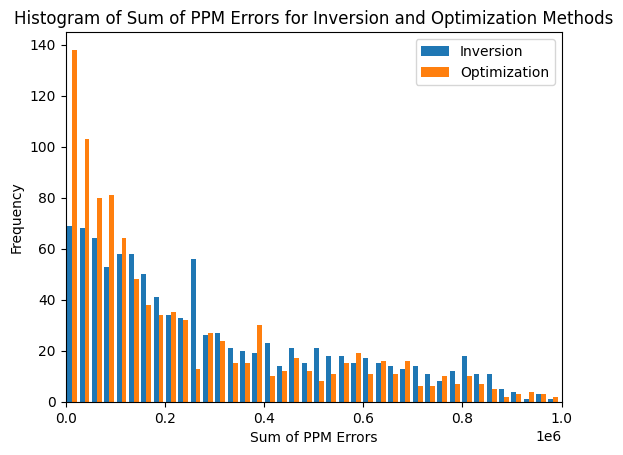

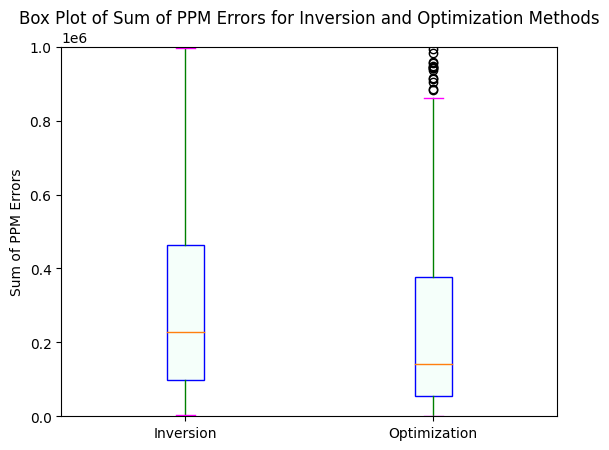

Average of PPM Inversion Errors: 298951.75425098627
Average of PPM Optimization Errors: 240564.52712321322
Standard Deviation of PPM Errors : Inversion Method: 245545.75615637164
Standard Deviation of PPM Errors : Optimization Method: 239985.82555281918
Average Difference between Optimization and Inversion PPM Errors: 58387.22712777303


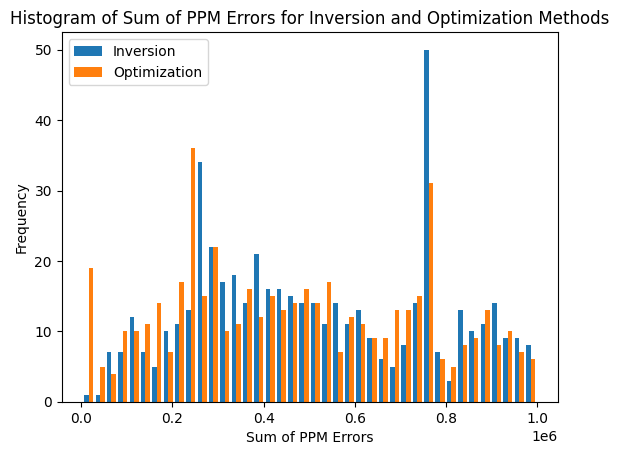

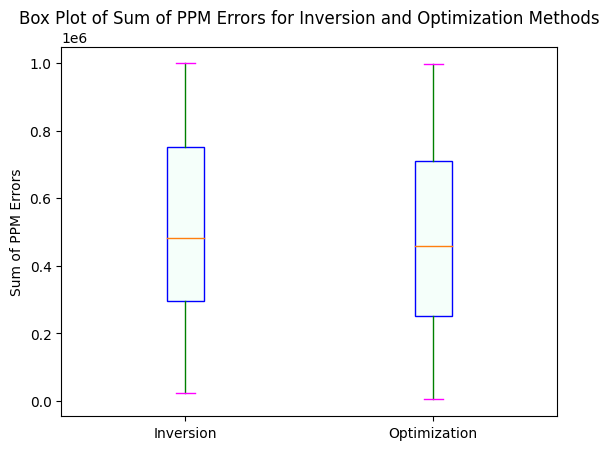

Average of PPM Inversion Errors: 513430.5052730521
Average of PPM Optimization Errors: 474151.25872657914
Standard Deviation of PPM Errors : Inversion Method: 252335.64737480495
Standard Deviation of PPM Errors : Optimization Method: 265443.6534971215
Average Difference between Optimization and Inversion PPM Errors: 39279.24654647296


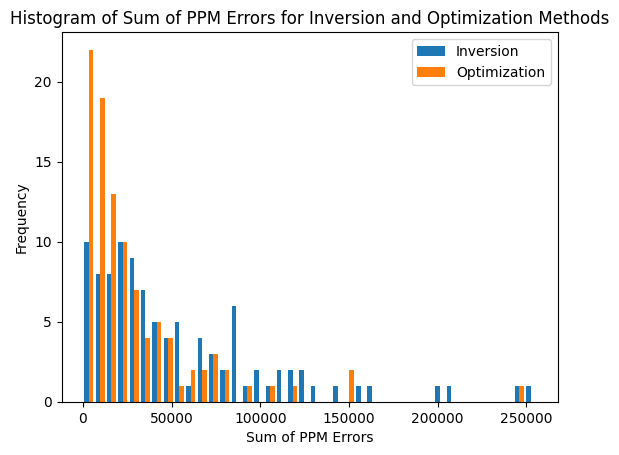

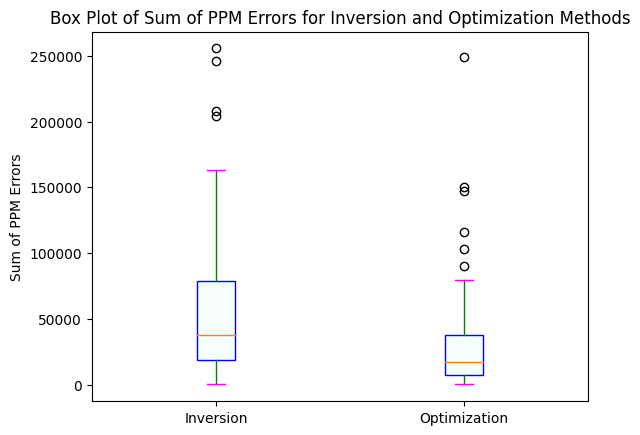

Average of PPM Inversion Errors: 54910.28776708903
Average of PPM Optimization Errors: 29763.43686233187
Standard Deviation of PPM Errors : Inversion Method: 52312.97809032504
Standard Deviation of PPM Errors : Optimization Method: 37008.539293539034
Average Difference between Optimization and Inversion PPM Errors: 25146.85090475716


In [75]:
# plotting for all the states, tru1, tru2, tru3, tru4_500, tru4_20k

plot_ppm_errors(errors1_inv, bins = 40, xlim = (0, 80000), ylim = (0, 80000))
plot_ppm_errors(errors2_inv, bins = 150, xlim = (0, 110000), ylim = (0, 100000))
plot_ppm_errors(errors3_inv, bins = 40, xlim = (0, 1000000), ylim = (0, 1000000))
plot_ppm_errors(errors4_500_inv, bins = 40)
plot_ppm_errors(errors4_20k_inv, bins = 40)


## Martin's data plots


#### For state tru4, both _500 and _20k datas

In [ ]:
#Reading and cleaning Martin;s data.
df_4_500 = pd.read_csv('mpDPFT_TabFunc_collapses_(105 120 0 90 15) 500 500_ParetoFront_20240708_093814.dat', delimiter='\s+', header=None)  # assuming space as delimiter and no header
df_4_20k = pd.read_csv('mpDPFT_TabFunc_collapses_(105 120 0 90 15) 20k 100_ParetoFront_20240708_093440.dat', delimiter='\s+', header=None)  # assuming space as delimiter and no header

# drop all columns except 3,4,5,6,7
# only keep columns 3,4,5,6,7
df_4_500 = df_4_500.drop(df_4_500.columns[0:2], axis=1)
df_4_20k = df_4_20k.drop(df_4_20k.columns[0:2], axis=1)
df_4_500_params = df_4_500.drop(df_4_500.columns[5:], axis=1)
df_4_20k_params = df_4_20k.drop(df_4_20k.columns[5:], axis=1)


#create lists of each row
param_list_500 = df_4_500_params.values.tolist()
param_list_20k = df_4_20k_params.values.tolist()

#create fidelity list for element of the sol list
fidelities_500 = []
fidelities_20k = []

for i in range(len(param_list_500)):
    fidelities_500.append(fnn.fid(tru4, param_list_500[i]))
for i in range(len(param_list_20k)):
    fidelities_20k.append(fnn.fid(tru4, param_list_20k[i]))

# finding ppm errors for each fidelity list
ppm_errors_martinopt_500 = [(2 - sum(i))*1e6 for i in fidelities_500]
ppm_errors_martinopt_20k = [(2 - sum(i))*1e6 for i in fidelities_20k]     # the ppm errors data for Optimization method using Martin's CMA-ES 

error_sum_lists_500 = [errors4_500_inv[0], ppm_errors_martinopt_500]
error_sum_lists_20k = [errors4_20k_inv[0], ppm_errors_martinopt_20k]


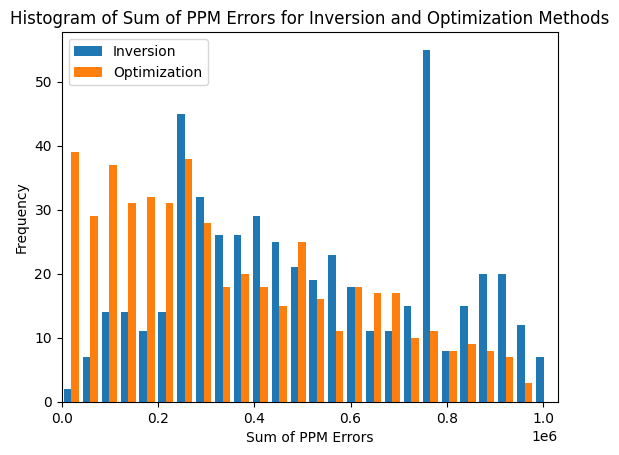

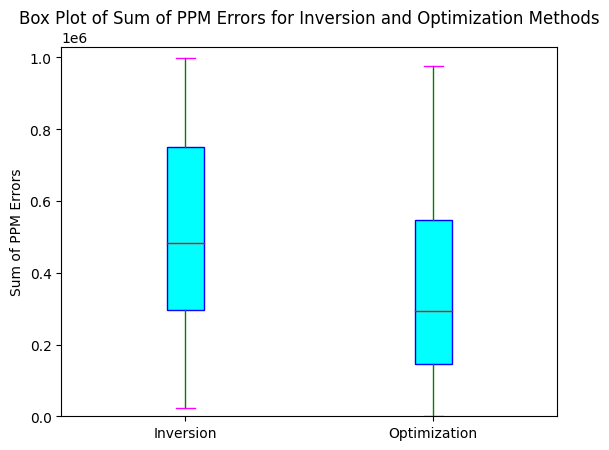

Average of PPM Inversion Errors: 513430.5052730521
Average of PPM Optimization Errors: 362140.48867876397
Standard Deviation of PPM Errors : Inversion Method: 252335.64737480495
Standard Deviation of PPM Errors : Optimization Method: 270475.36128975137
Average Difference between Optimization and Inversion PPM Errors: 151290.01659428814


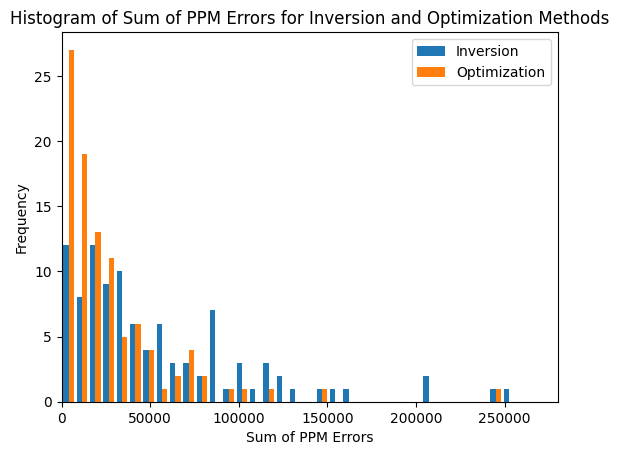

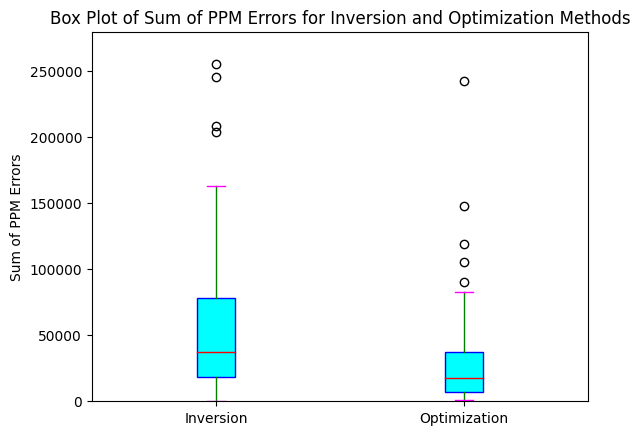

Average of PPM Inversion Errors: 54910.28776708903
Average of PPM Optimization Errors: 40997.29541247154
Standard Deviation of PPM Errors : Inversion Method: 52312.97809032504
Standard Deviation of PPM Errors : Optimization Method: 129325.66041196475
Average Difference between Optimization and Inversion PPM Errors: 13912.992354617485


In [ ]:
# plotting Martin's data

# error_sum_lists_500
plot_ppm_errors(error_sum_lists_500, bins = 40, xlim = (0, 1030000), ylim = (0, 1030000))
plot_ppm_errors(error_sum_lists_20k, bins = 170, xlim = (0, 280000), ylim = (0, 280000))
            


#### Repeating for Martin's tru1, tru2, tru3 as above

In [ ]:
# for: 
# tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]      # 90 deg non zero phi; [30,120,45,90,30]
# tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi; [15,75,45,90,60]
# tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                  # 30 deg diff, very uneven alpha  ; [30,60,0,45,15]
df_1 = pd.read_csv('mpDPFT_TabFunc_collapses_(30 120 45 90 30) 1k 1k_ParetoFront_20240708_092410.dat', delimiter='\s+', header=None)  # assuming space as delimiter and no header
df_2 = pd.read_csv('mpDPFT_TabFunc_collapses_(15 75 45 90 60) 1k 1k_ParetoFront_20240708_091654.dat', delimiter='\s+', header=None)  
df_3 = pd.read_csv('mpDPFT_TabFunc_collapses_(30 60 0 45 15) 1k 1k_ParetoFront_20240708_092412.dat', delimiter='\s+', header=None)  

# drop all columns except 3,4,5,6,7
# only keep columns 3,4,5,6,7
df_1 = df_1.drop(df_1.columns[0:2], axis=1)
df_1_params = df_1.drop(df_1.columns[5:], axis=1)
df_2 = df_2.drop(df_2.columns[0:2], axis=1)
df_2_params = df_2.drop(df_2.columns[5:], axis=1)
df_3 = df_3.drop(df_3.columns[0:2], axis=1)
df_3_params = df_3.drop(df_3.columns[5:], axis=1)

#create lists of each row
param_list_1 = df_1_params.values.tolist()
param_list_2 = df_2_params.values.tolist()
param_list_3 = df_3_params.values.tolist()

#create fidelity list for element of the sol list
fidelities_1, fidelities_2, fidelities_3 = [], [], []

for i in range(len(param_list_1)):
    fidelities_1.append(fnn.fid(tru1, param_list_1[i]))
for i in range(len(param_list_2)):
    fidelities_2.append(fnn.fid(tru2, param_list_2[i]))
for i in range(len(param_list_3)):
    fidelities_3.append(fnn.fid(tru3, param_list_3[i]))

# finding ppm errors for each fidelity list
ppm_errors_martinopt_1 = [(2 - sum(i))*1e6 for i in fidelities_1]
ppm_errors_martinopt_2 = [(2 - sum(i))*1e6 for i in fidelities_2]
ppm_errors_martinopt_3 = [(2 - sum(i))*1e6 for i in fidelities_3]     # the ppm errors data for Optimization method using Martin's CMA-ES

error_sum_lists_1 = [errors1_inv[0], ppm_errors_martinopt_1]
error_sum_lists_2 = [errors2_inv[0], ppm_errors_martinopt_2]
error_sum_lists_3 = [errors3_inv[0], ppm_errors_martinopt_3]



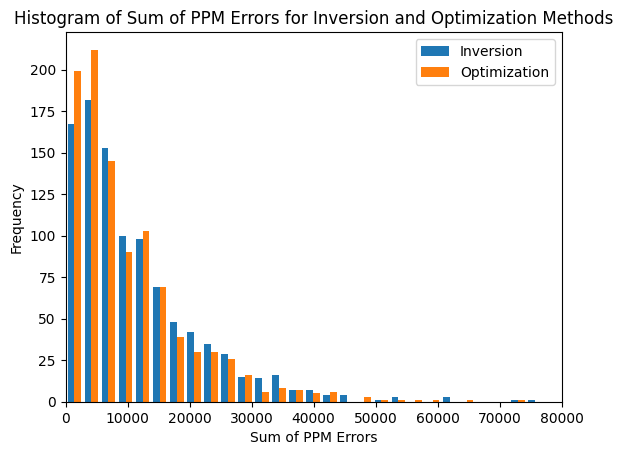

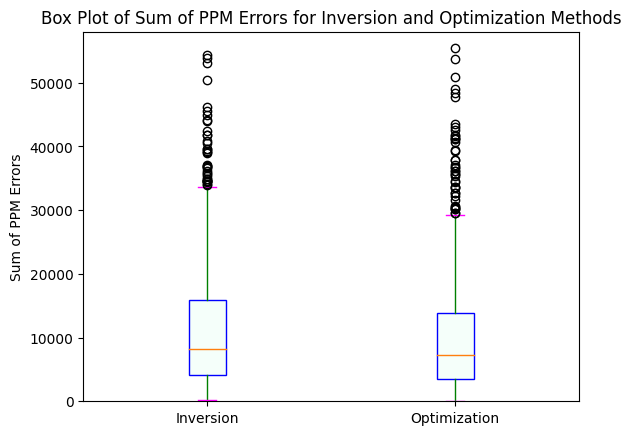

Average of PPM Inversion Errors: 11551.084288721351
Average of PPM Optimization Errors: 10238.768968803195
Standard Deviation of PPM Errors : Inversion Method: 10592.55859889549
Standard Deviation of PPM Errors : Optimization Method: 9582.245830455277
Average Difference between Optimization and Inversion PPM Errors: 1312.3153199181547


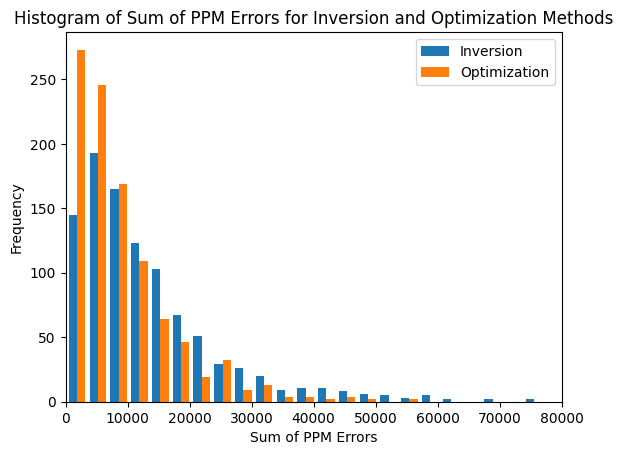

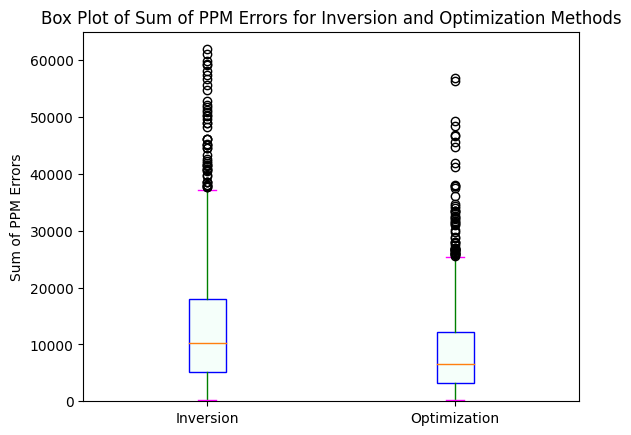

Average of PPM Inversion Errors: 16063.402527822594
Average of PPM Optimization Errors: 9268.568807716652
Standard Deviation of PPM Errors : Inversion Method: 28479.540107588673
Standard Deviation of PPM Errors : Optimization Method: 10083.92678054856
Average Difference between Optimization and Inversion PPM Errors: 6794.83372010594


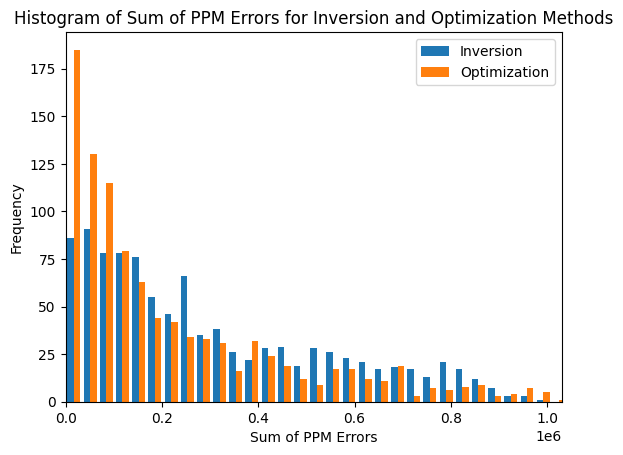

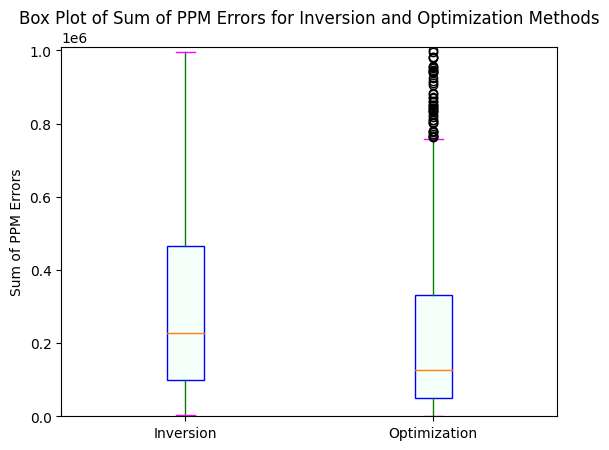

Average of PPM Inversion Errors: 298951.75425098627
Average of PPM Optimization Errors: 226797.15260485976
Standard Deviation of PPM Errors : Inversion Method: 245545.75615637164
Standard Deviation of PPM Errors : Optimization Method: 240161.54262421283
Average Difference between Optimization and Inversion PPM Errors: 72154.60164612648


In [ ]:
# plotting Martin's data for tru1, tru2, tru3
plot_ppm_errors(error_sum_lists_1, bins = 30, xlim = (0, 80000), ylim = (0, 58000))
plot_ppm_errors(error_sum_lists_2, bins = 100, xlim = (0, 80000), ylim = (0, 65000))
plot_ppm_errors(error_sum_lists_3, bins = 40, xlim = (0, 1030000), ylim = (0, 1010000))